In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)
sns.set(style='darkgrid')

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Explorative Data Analysis 
* focus is often a visual representation of the data 


In [3]:
df_plot = pd.read_csv('../data/processed/COVID_small_flat_table.csv', sep=';')
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


<Figure size 1152x648 with 0 Axes>

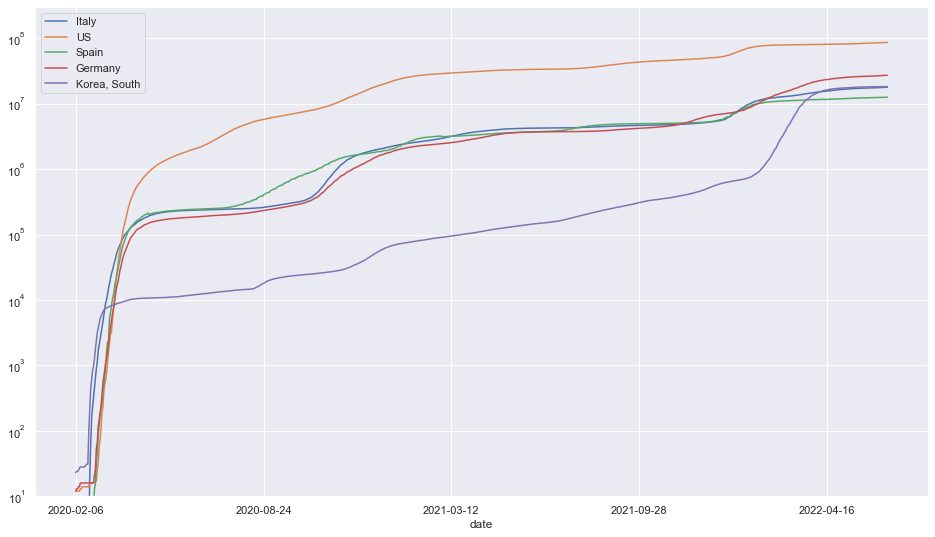

In [4]:
plt.figure()
ax = df_plot.iloc[15:, :].set_index('date').plot()
plt.ylim(10, 30e7)
ax.set_yscale('log')

# Plot.ly

In [5]:
import plotly.graph_objects as go

In [6]:
import plotly
plotly.__version__

'5.8.2'

In [7]:
country_list = [
    'Italy',
    'US',
    'Spain',
    'Germany',
    'Korea, South',
]

In [8]:
fig = go.Figure()
for each in country_list:
    fig.add_trace(
        go.Scatter(x=df_plot.date,
                   y=df_plot[each],
                   mode='markers+lines',
                   opacity=0.9,
                   line_width=2,
                   marker_size=1,
                   name=each))
fig.update_layout(
    width=1600,
    height=1200,
    xaxis_title='Time',
    yaxis_title=
    'Confirmed infected people (source johns hopkins database, log = scale)')

fig.update_yaxes(type='log', range=[1.1, 5.5])

fig.update_layout(xaxis_rangeslider_visible=True)
# fig.show(renderer = 'chrome')
fig.show()

In [9]:
import dash
from dash import dcc
from dash import html

app = dash.Dash()
app.layout = html.Div([
    html.Label('Multi-Select Country'),
    dcc.Dropdown(id='country_drop_down',
                 options=[{
                     'label': 'Italy',
                     'value': 'Italy'
                 }, {
                     'label': 'US',
                     'value': 'US'
                 }, {
                     'label': 'Spain',
                     'value': 'Spain'
                 }, {
                     'label': 'Germany',
                     'value': 'Germany'
                 }, {
                     'label': 'Korea, South',
                     'value': 'Korea, South'
                 }],
                 value=['US', 'Germany'],
                 multi=True),
    dcc.Graph(figure=fig, id='main_window_slope')
])

<ipython-input-9-a7cfbabf34c6>:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-9-a7cfbabf34c6>:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [10]:
from dash.dependencies import Input, Output


@app.callback(Output('main_window_slope', 'figure'),
              [Input('country_drop_down', 'value')])
def update_figure(country_list):

    traces = []
    for each in country_list:
        traces.append(
            dict(x=df_plot.date,
                 y=df_plot[each],
                 mode='markers+lines',
                 opacity=0.9,
                 line_width=2,
                 marker_size=1,
                 name=each))

    return {
        'data':
        traces,
        'layout':
        dict(
            width=1280,
            height=720,
            xaxis_title='Time',
            yaxis_title=
            'Confirmed infected people (source johns hopkins case, log-scale)',
            xaxis={
                'tickangle': -45,
                'nticks': 20,
                'tickfont': dict(size=14, color='#7f7f7f'),
            },
            yaxis={
                'type': 'log',
                'range': '[1.1, 5.5]'
            })
    }

In [11]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
